# Setup
- Import libraries
- Set constants
- Define transformation functions between node number and cell coordinates
- Create graph and add nodes

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from math import floor
import random

WIDTH = 20
HEIGHT = 15

START = (0, 0)
END = (19, 14)

nodes = WIDTH * HEIGHT

def xy2node(x, y):
  if x < 0 or x >= WIDTH or y < 0 or y >= HEIGHT:
    return None
  return x + y * WIDTH

def node2xy(node):
  if node < 0 or node >= nodes:
    return None
  return (node % WIDTH, floor(node/WIDTH))

# Create the graph
graph = nx.Graph()

# Add the nodes
graph.add_nodes_from([(node, {'pos': node2xy(node)}) for node in range(nodes)])

# Fully connect the grid

In [2]:
graph.clear_edges()

# Add horizontal edges
graph.add_edges_from([(xy2node(x, y), xy2node(x+1, y)) for x in range(WIDTH-1) for y in range(HEIGHT)])

# Add vertical edges
graph.add_edges_from([(xy2node(x, y), xy2node(x, y+1)) for x in range(WIDTH) for y in range(HEIGHT-1)])

# Make a maze with one path

In [3]:
graph.clear_edges()

active_path: list[int] = [xy2node(*START)]

visited_nodes = set()

# while active_node != END:

while len(visited_nodes) < nodes:
  active_node = active_path[-1]
  visited_nodes.add(active_node)

  active_xy = node2xy(active_node)

  xy_options: list[tuple[int, int]] = [
      (active_xy[0], active_xy[1]+1),
      (active_xy[0]+1, active_xy[1]),
      (active_xy[0], active_xy[1]-1),
      (active_xy[0]-1, active_xy[1])]

  node_options: list[int] = [xy2node(*item) for item in xy_options if xy2node(*item) is not None and xy2node(*item) not in visited_nodes]

  if len(node_options) > 0:
    next_node = random.choice(node_options)
    graph.add_edge(active_node, next_node)
    if next_node != xy2node(*END):
      active_path.append(next_node)
    else:
      visited_nodes.add(next_node)
  else:
    active_path.pop()

# Add random edges

In [4]:
edges_to_add = 20

edges_added = 0
while edges_added < edges_to_add:
  node1: tuple[int, int] = node2xy(random.randint(0, nodes-1))

  # Pick another node either right or up
  node2 = random.choice([(node1[0]+1, node1[1]), (node1[0], node1[1]+1)])

  if xy2node(*node2) is not None and not graph.has_edge(xy2node(*node1), xy2node(*node2)):
    graph.add_edge(xy2node(*node1), xy2node(*node2))
    edges_added += 1

# Display the maze

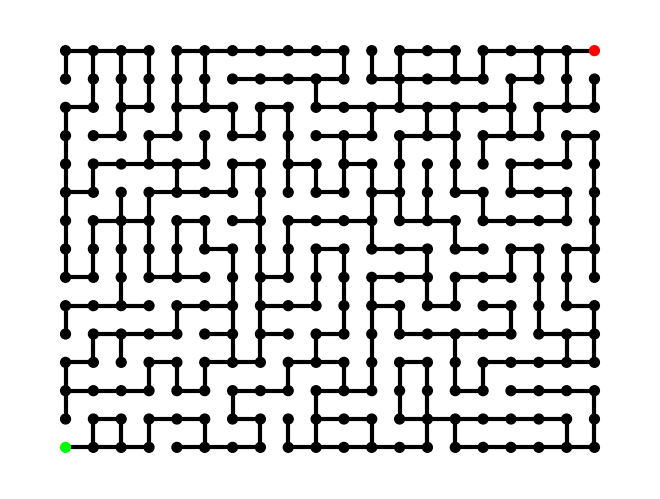

In [5]:
pos=nx.get_node_attributes(graph,'pos')

colors = []
for node in range(nodes):
  xy = node2xy(node)
  if xy == START:
    colors.append('lime')
  elif xy == END:
    colors.append('red')
  else:
    colors.append('black')

nx.draw(graph, pos, node_color=colors, node_size=50, width=3)  # networkx draw()
plt.draw()  # pyplot draw()
plt.show()